<a href="https://colab.research.google.com/github/kunalNbadgujar/YES-BANK-STOCK-CLOSING-PRICE-PREDICTION/blob/main/team_YESBANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 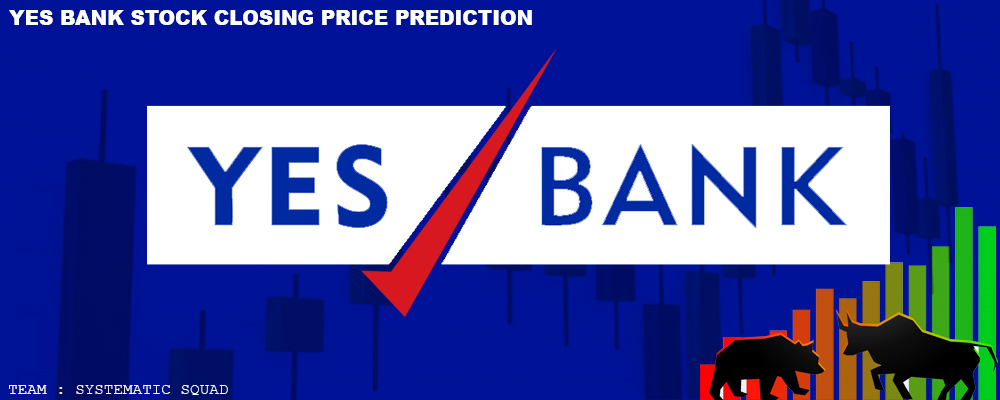

# **YES BANK STOCK CLOSING PRICE PREDICTION**

##### **Project Type** .......................   - **Regression**
##### **Contribution**  ........................ - Team
##### **Team Member 1 -**.................................- Kunal Badgujar
##### **Team Member 2 -**.................................- Aarti Gade
##### **Team Member 3 -**.................................- Vivek Tanagawade


### **PROBLEM STATEMENT**

### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly

### stock prices of the bank since its inception and includes closing, starting, highest, and lowest

### stock prices of every month. The main objective is to predict the stock’s closing price of the month.


---



#We have Yes Bank monthly stock price dataset. It has following features (Column):
### **1) Open** : Opening price of the stock of particular day
### **2) High** : It's the highest price at which a stock traded during a period
### **3) Low** : It's the lowest price at which stock traded during a period
### **4) Close** : Closing price of a stock at the end of a Trading Day
### **5) Date** : We will use it as a index
---

<b>"Trying to know our data because if you know your data then only you can implent your ideas and get insights from it"</b>

We understood our problem and what our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

<b> Feature Engineering</b>: Introducing New Variables, Dummy Variables

<b>Univariate Analysis</b>: Distplot, Histogram, Barplot

<b>Bivariate Analysis</b>: Boxplot, Jointplot, Heatmap, 

<b>Introduced Models</b>: Linear Regression, Lasso, Ridge and ElasticNet


---



# ***Let's Begin !***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT YES BANK /data_YesBank_StockPrices.csv')



---


### Dataset First *View*

In [4]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42




---


### Dataset Rows & Columns count

In [5]:
df.shape

(185, 5)

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Hurray! There is no null values in any instances.**

But **Date** have values in object data type. So, we need to convert it into proper date format.

In [7]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))


In [8]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [9]:
df.tail()


,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


In [10]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000




---


#### Duplicate Values

In [11]:
len(df[df.duplicated()])

0

There is no duplication in our data which is a good sign otherwise we have to deal with that too.


---



As it is clearly shown in the descriptive statistics table, there is very high variation within features like **High**, **Low** and **Close**. 





---

# **EXPLORATORY DATA ANALYSIS**

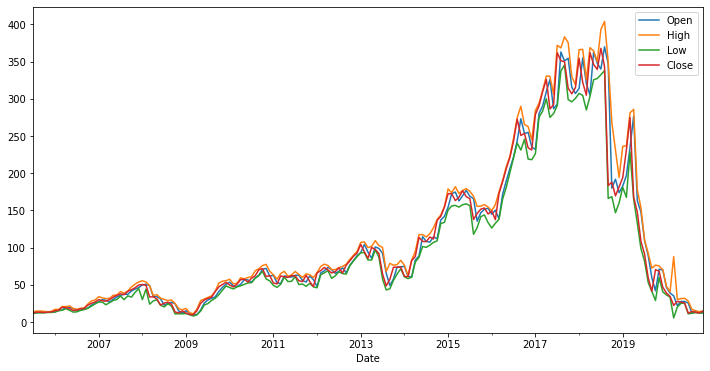

In [12]:
stock_price = df.set_index('Date')

stock_price.plot.line(figsize = (12,6))


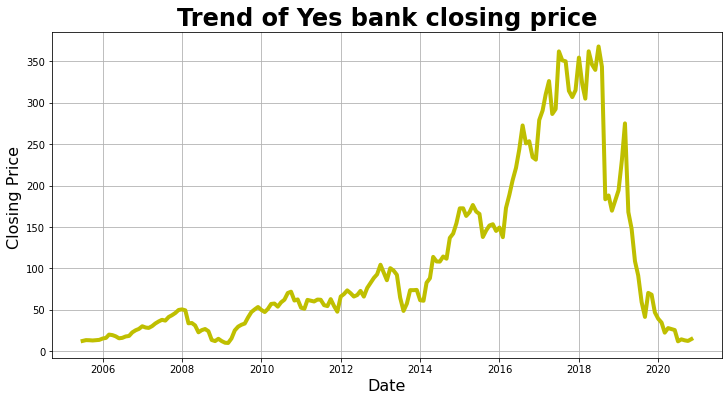

In [13]:
plt.figure(figsize = (12,6))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold',fontsize=24)
plt.plot(df['Date'],df['Close'],color='y',linewidth=4)
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Price ',fontsize = 16)
plt.show()

After 2018 there is sudden fall in the stock closing price. 

It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.



---



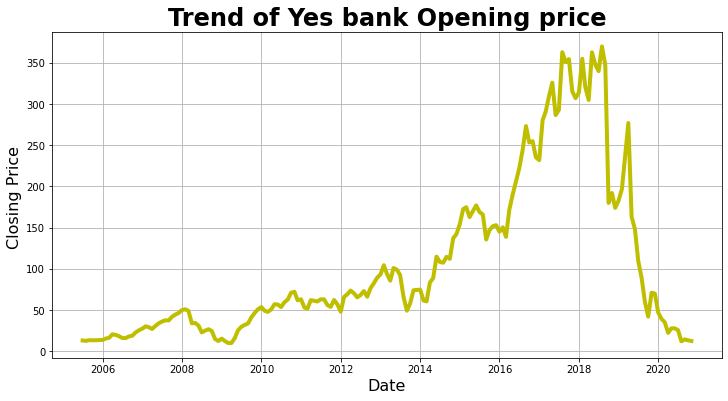

In [14]:
plt.figure(figsize = (12,6))
plt.grid(True)
plt.title('Trend of Yes bank Opening price',fontweight = 'bold',fontsize=24)
plt.plot(df['Date'],df['Open'],color='y',linewidth=4)
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Price ',fontsize = 16)
plt.show()



So here in this graph, we can observe that the graph for Yes bank opening price and Yes bank closing price has nearly same result.

 Opening price also started increasing in year 2014 and it was at peak in year 2018. But after 2018 it started falling down contineously .


---





---


### **Now,**

WE WILL TAKE A LOOK AT **DISTRIBUTION PLOTS** .

In [15]:
#copying data to preserve orignal file
df1= df.copy()

In [16]:
# Dipendant and Indipendant Variables
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

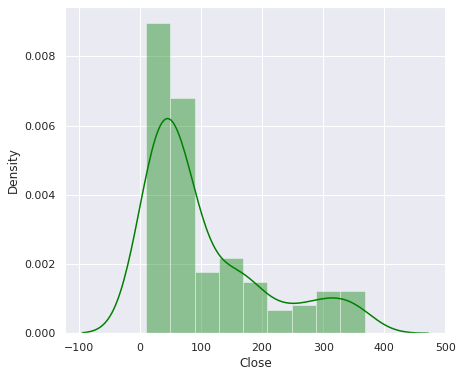

In [17]:
# DIPENDANT VARIABLE

plt.figure(figsize=(15,6))
sns.set()
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'],color='green')

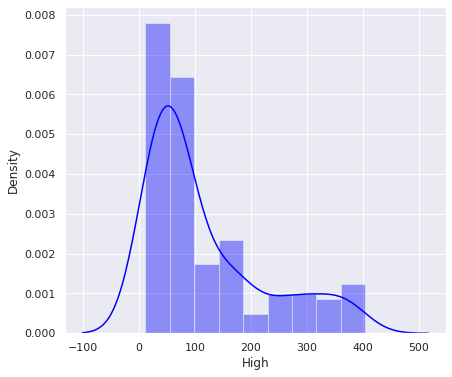

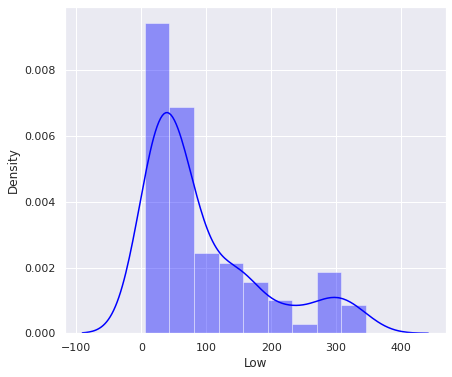

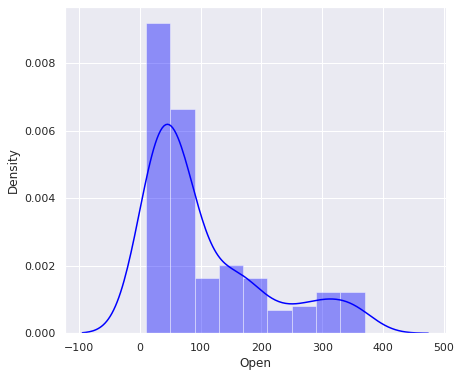

In [18]:
# INDIPENDANT VARIABLES

for var in indep_var:
    plt.figure(figsize=(15,6))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var],color='blue')
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

### **LOG TRANSFORMATION**

---
### The distribution is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying Log Transformation then we'll have a look how this data behave.

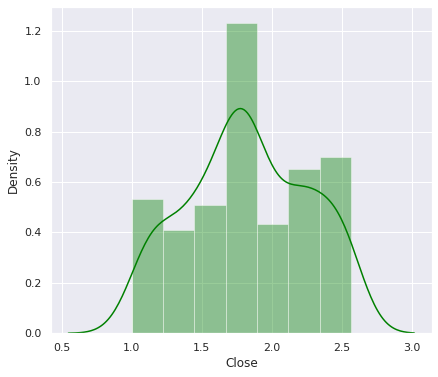

In [19]:
# DIPENDANT VARIABLE

plt.figure(figsize=(15,6))
sns.set()
plt.subplot(1, 2, 1)
fig = sns.distplot(np.log10(df1['Close']),color ='green')

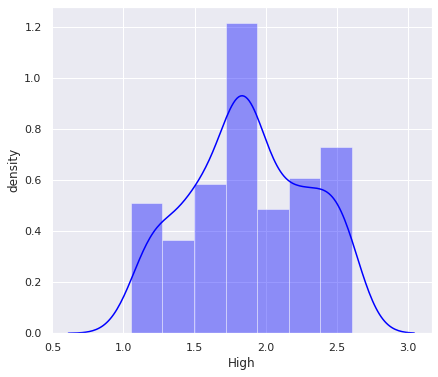

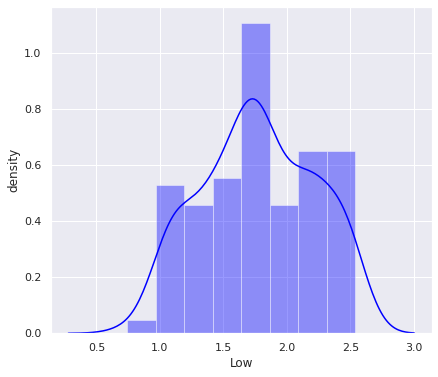

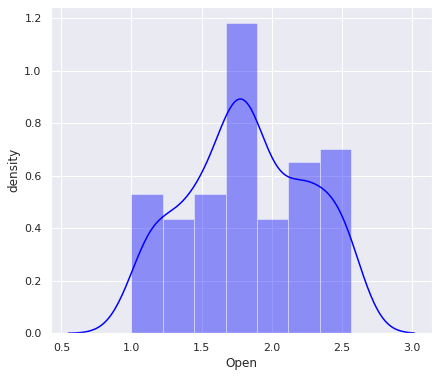

In [20]:
# INDIPENDENT VARIABLE

for var in indep_var:
    plt.figure(figsize=(15,6))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]),color ='blue')
    fig.set_ylabel('density')
    fig.set_xlabel(var)



---


### NOW CHECKING THE CORELATION WITH INDIPENDANT VARIABLE

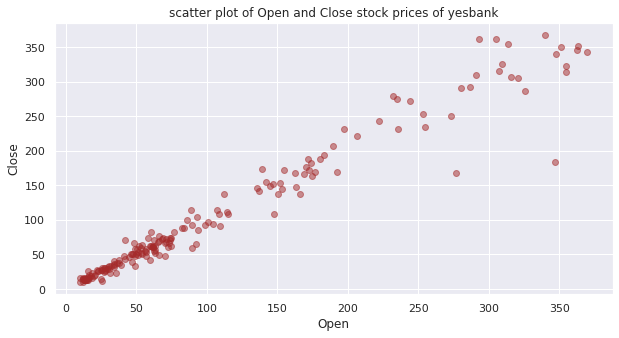

In [21]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df1['Open'],df1['Close'],alpha = 0.5,color="brown")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

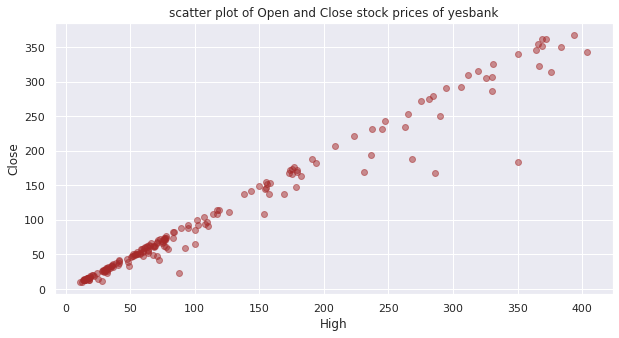

In [22]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df1['High'],df1['Close'],alpha = 0.5,color="brown")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

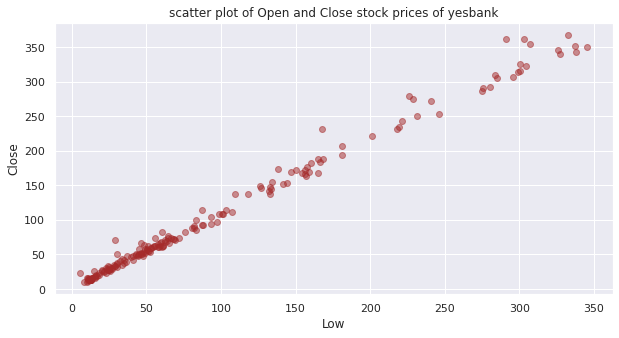

In [23]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df1['Low'],df1['Close'],alpha = 0.5,color="brown")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()


###  In all above scatter plots we can conclude that  high correlation of close price with other features.

---



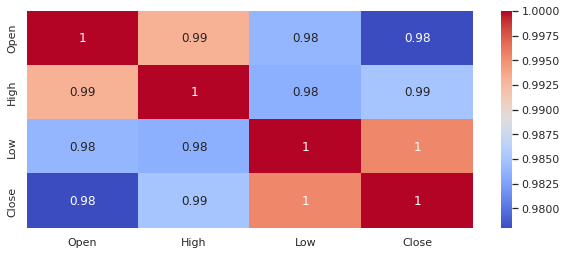

In [25]:
#Checking Correlation using heatmap

plt.figure(figsize=(10,4))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')
plt.show()